# Tugas Analisis Multimedia: **Image (Citra Digital)**

**Mata Kuliah:** Sistem & Teknologi Multimedia  
**Nama:** Bintang Fikri Fauzan 
**NIM:** 122140008  

---

## Deskripsi Tugas

Tugas ini bertujuan untuk memahami **representasi dasar data citra digital (image)** melalui praktik langsung memuat data, visualisasi komponen warna, serta melakukan analisis spasial sederhana menggunakan berbagai teknik dasar pengolahan citra.

Anda akan bekerja dengan satu atau beberapa gambar (foto diri, objek, atau lingkungan sekitar) untuk:

* Mengamati struktur data piksel dan channel warna (RGB, Grayscale, HSV, dsb.)
* Menganalisis perbedaan hasil visualisasi antar representasi warna
* Melakukan eksplorasi sederhana terhadap transformasi citra (cropping, filtering, edge detection, dll.)
* Menyimpulkan pengaruh setiap tahap pemrosesan terhadap persepsi visual

Fokus tugas ini adalah pada **pemahaman konsep representasi spasial citra digital** dan **interpretasi hasil visualisasi**, **bukan** pada manipulasi kompleks atau penerapan model pembelajaran mesin.

## Link Repository GitHub
[GitHub](https://github.com/bintangfikrif/Mulmed)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import mediapipe as mp

In [3]:
IMG_1_PATH = os.path.join(os.getcwd(), 'media', 'image1.jpg')
IMG_2_PATH = os.path.join(os.getcwd(), 'media', 'image2.jpg')
IMG_3_PATH = os.path.join(os.getcwd(), 'media', 'image3.jpg')
IMG_4_PATH = os.path.join(os.getcwd(), 'media', 'image4.jpg')

### **Soal 1 — Cropping dan Konversi Warna**

* Ambil sebuah gambar diri Anda (*selfie*) menggunakan kamera atau smartphone.
* Lakukan **cropping secara manual** untuk menghasilkan dua potongan:

  * Cropping **kotak persegi pada area wajah**.
  * Cropping **persegi panjang pada area latar belakang**.
* Resize hasil crop menjadi **920×920 piksel**.
* Konversi gambar menjadi **grayscale** dan **HSV**, lalu tampilkan ketiganya berdampingan.
* Tambahkan **anotasi teks** berisi nama Anda di atas kepala pada gambar hasil crop.

  * Gaya teks (font, warna, posisi, ukuran, ketebalan) **dibebaskan**.
* Jelaskan efek **cropping** dan **perubahan warna** menggunakan **Markdown**.


Image Shape: 1836x3264, Channels: 3


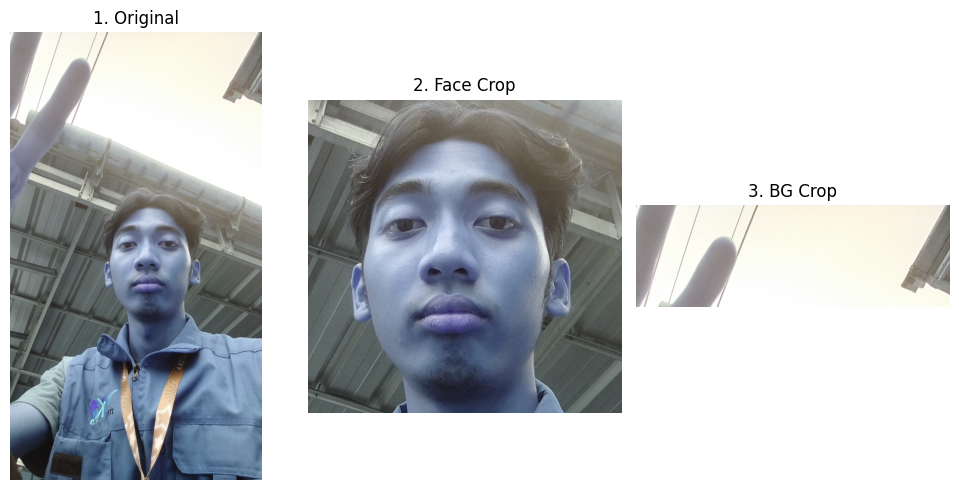

In [55]:
# Load Image
img1 = cv2.imread(IMG_1_PATH)
height, width, channel = img1.shape
print(f"Image Shape: {width}x{height}, Channels: {channel}")

# Face Cropping 
left_face = 550 # x
upper_face = 1150 # y
size = 1000
right_face = left_face + size
lower_face = upper_face + size
cropped_img = img1[upper_face:lower_face, left_face:right_face]

# Background Cropping 
left_bg = 0 # x
upper_bg = 0 # y
right_bg = width
lower_bg = 600
cropped_img_bg = img1[upper_bg:lower_bg, left_bg:right_bg]

# Show Original and Cropped Image
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title("1. Original")
plt.imshow(img1)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("2. Face Crop")
plt.imshow(cropped_img)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("3. BG Crop")
plt.imshow(cropped_img_bg)
plt.axis('off')

plt.tight_layout()
plt.show()


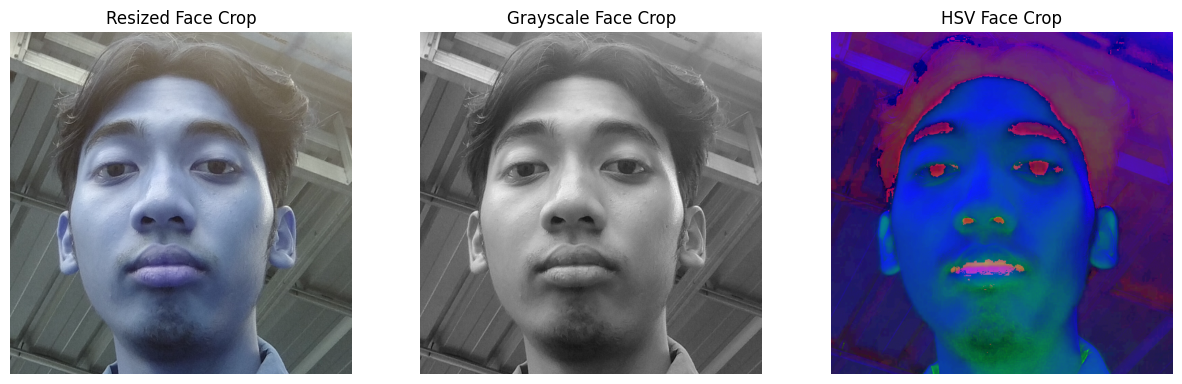

In [56]:
# Resize Face Crop
new_size = (920, 920)
resized_face = cv2.resize(cropped_img, new_size, interpolation=cv2.INTER_LINEAR)

# Convert to Greyscale
grayscaled_face = cv2.cvtColor(resized_face, cv2.COLOR_BGR2GRAY)

# Convert to HSV
hsv_face = cv2.cvtColor(resized_face, cv2.COLOR_BGR2HSV)

# Plot all resized face images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Resized Face Crop")
plt.imshow(resized_face)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Grayscale Face Crop")
plt.imshow(grayscaled_face, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("HSV Face Crop")
plt.imshow(hsv_face)
plt.axis('off')

plt.show()


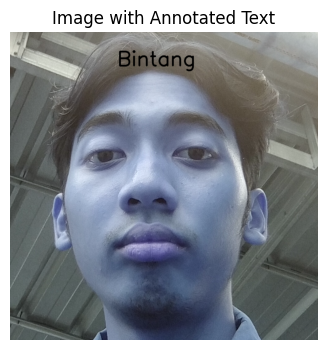

In [57]:
# Add Anotated Text Above the Face
text = "Bintang"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 2
thickness = 3

# Position
pos = (320, 100)

# Put Text on Image
img_with_text = resized_face.copy()
cv2.putText(img_with_text, text, pos, font, font_scale, (0, 0, 0), thickness, cv2.LINE_AA)

# Show Image with Text
plt.figure(figsize=(4, 4))
plt.title("Image with Annotated Text")
plt.imshow(img_with_text)
plt.axis('off')
plt.show()


In [58]:
# Save Images
face_crop_path = os.path.join(os.getcwd(), 'results_ws4', '1_face_crop.png')
grayscaled_face_path = os.path.join(os.getcwd(), 'results_ws4', '1_grayscaled_face.png')
hsv_face_path = os.path.join(os.getcwd(), 'results_ws4', '1_hsv_face.png')
annotated_text_path = os.path.join(os.getcwd(), 'results_ws4', '1_annotated_text.png')

cv2.imwrite(face_crop_path, resized_face)
cv2.imwrite(grayscaled_face_path, grayscaled_face)
cv2.imwrite(hsv_face_path, hsv_face)
cv2.imwrite(annotated_text_path, img_with_text)

True

### **Soal 2 — Manipulasi Channel Warna RGB**

* Gunakan gambar hasil crop dari Soal 1.
* Konversikan gambar ke ruang warna **RGB**.
* Lakukan manipulasi channel warna dengan cara:

  * **Naikkan intensitas channel merah sebanyak 50 poin** (maksimum 255).
  * **Turunkan intensitas channel biru sebanyak 30 poin** (minimum 0).
* Teknik atau cara menaikkan/menurunkan intensitas **dibebaskan**, asalkan logis dan hasilnya terlihat.
* Gabungkan kembali channel warna dan **simpan gambar hasil modifikasi dalam format `.png`**.
* **Tampilkan histogram per channel (R, G, B)** untuk gambar asli dan hasil modifikasi menggunakan `matplotlib.pyplot.hist`.
* Jelaskan dampak perubahan RGB pada warna gambar dalam sel **Markdown**.


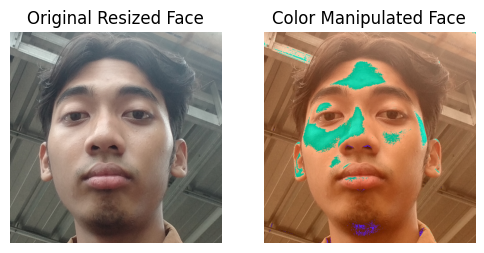

In [59]:
# Convert to RGB
resized_face_rgb = cv2.cvtColor(resized_face, cv2.COLOR_BGR2RGB)

# Manipulate Color Channel
resized_img_clr = resized_face_rgb.copy()

resized_img_clr[:, :, 0] = np.clip(resized_img_clr[:, :, 0] + 50, 0, 255)  # Increase Red
resized_img_clr[:, :, 2] = np.clip(resized_img_clr[:, :, 2] - 30, 0, 255)  # Decrease Blue

# Plot Image
plt.figure(figsize=(6, 4))

plt.subplot(1, 2, 1)
plt.title("Original Resized Face")
plt.imshow(resized_face_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Color Manipulated Face")
plt.imshow(resized_img_clr)
plt.axis('off')

plt.show()

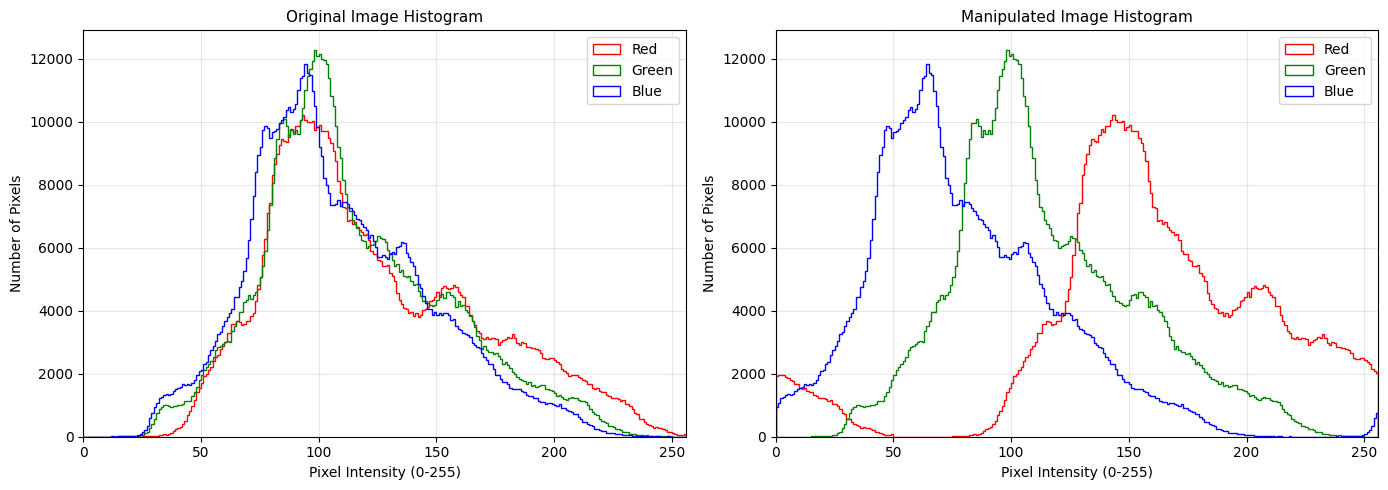

In [60]:
# Histogram Plot Comparasion
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

colors = ('r', 'g', 'b')
labels = ('Red', 'Green', 'Blue')

# Plot 1: Original Image Histogram 
for i, (col, label) in enumerate(zip(colors, labels)):
    channel_data = resized_face_rgb[:, :, i].ravel()
    
    axs[0].hist(channel_data, 
                bins=256, 
                range=(0, 256), 
                color=col, 
                label=label, 
                histtype='step') 

axs[0].set_title("Original Image Histogram", fontsize=11)
axs[0].set_xlabel("Pixel Intensity (0-255)")
axs[0].set_ylabel("Number of Pixels")
axs[0].legend()
axs[0].grid(True, alpha=0.3)
axs[0].set_xlim(0, 256) 

# Plot 2: Manipulated Image Histogram 
for i, (col, label) in enumerate(zip(colors, labels)):
    channel_data = resized_img_clr[:, :, i].ravel()
    
    axs[1].hist(channel_data, 
                bins=256, 
                range=(0, 256), 
                color=col, 
                label=label, 
                histtype='step')

axs[1].set_title("Manipulated Image Histogram", fontsize=11)
axs[1].set_xlabel("Pixel Intensity (0-255)")
axs[1].set_ylabel("Number of Pixels")
axs[1].legend()
axs[1].grid(True, alpha=0.3)
axs[1].set_xlim(0, 256) 

plt.tight_layout()

# Save Histogram Plot
histogram_plot = os.path.join(os.getcwd(), 'results_ws4', '2_histogram_comparasion.png')
plt.savefig(histogram_plot)

plt.show()

In [61]:
# Save Image
color_manipulated = os.path.join(os.getcwd(), 'results_ws4', '2_color_manipulated.png')

cv2.imwrite(color_manipulated, cv2.cvtColor(resized_img_clr, cv2.COLOR_RGB2BGR))

True

### **Soal 3 — Deteksi Tepi dan Filter Citra**

* Ambil gambar **objek dengan background bertekstur** (misalnya kain bermotif, jerami, atau batu).
* Terapkan **edge detection (Canny)** dan tampilkan hasilnya.
* Lakukan **thresholding dengan nilai ambang tertentu** (bebas Anda tentukan) agar hanya objek utama yang tersisa.
* Buat **bounding box** di sekitar objek hasil segmentasi (boleh manual atau otomatis).
* Terapkan **filter blur** dan **filter sharpening**, lalu **bandingkan hasil keduanya**.
* Jelaskan bagaimana setiap filter memengaruhi detail gambar dalam format **Markdown**.


(np.float64(-0.5), np.float64(1327.5), np.float64(1267.5), np.float64(-0.5))

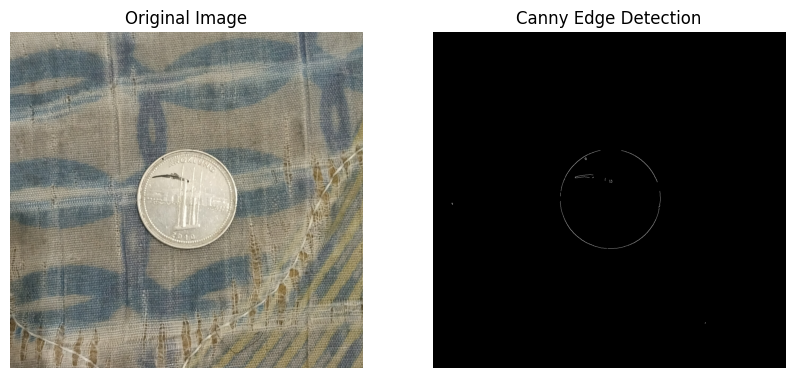

In [47]:
# Load Image
img2 = cv2.imread(IMG_2_PATH)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Gaussian Blur
blur = cv2.GaussianBlur(img2, (5, 5), 0)

# Canny Edge Detection
edges = cv2.Canny(blur, 250, 380)

# Plot Original vs Canny
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img2)
axs[0].set_title("Original Image", fontsize=12)
axs[0].axis("off")

axs[1].imshow(edges, cmap='gray')
axs[1].set_title("Canny Edge Detection", fontsize=12)
axs[1].axis("off")

(np.float64(-0.5), np.float64(1327.5), np.float64(1267.5), np.float64(-0.5))

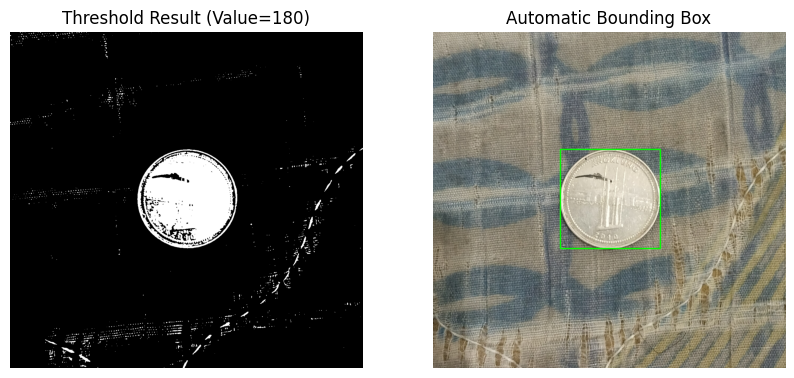

In [48]:
# Thresholding (This part is unchanged)
gray_blur = cv2.cvtColor(blur, cv2.COLOR_RGB2GRAY)

threshold_value = 180
_, thresh_img = cv2.threshold(gray_blur, threshold_value, 255, cv2.THRESH_BINARY)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_with_bbox = img2.copy() 

if contours:
    # Find the largest contour (assuming it's your main object)
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Get the bounding box coordinates for that contour
    x, y, w, h = cv2.boundingRect(largest_contour)
    
    # Draw the automatically found rectangle
    cv2.rectangle(
        img_with_bbox, 
        (x, y),                  # Top-left corner (automatic)
        (x + w, y + h),          # Bottom-right corner (automatic)
        (0, 255, 0),             # Color (Green)
        3                        # Thickness
    )
else:
    print("No contours were found.")

# Plot Threshold and Bounding Box results
fig_bbox, axs_bbox = plt.subplots(1, 2, figsize=(10, 5))

axs_bbox[0].imshow(thresh_img, cmap='gray')
axs_bbox[0].set_title(f"Threshold Result (Value={threshold_value})", fontsize=12)
axs_bbox[0].axis("off")

axs_bbox[1].imshow(img_with_bbox)
axs_bbox[1].set_title("Automatic Bounding Box", fontsize=12)
axs_bbox[1].axis("off")

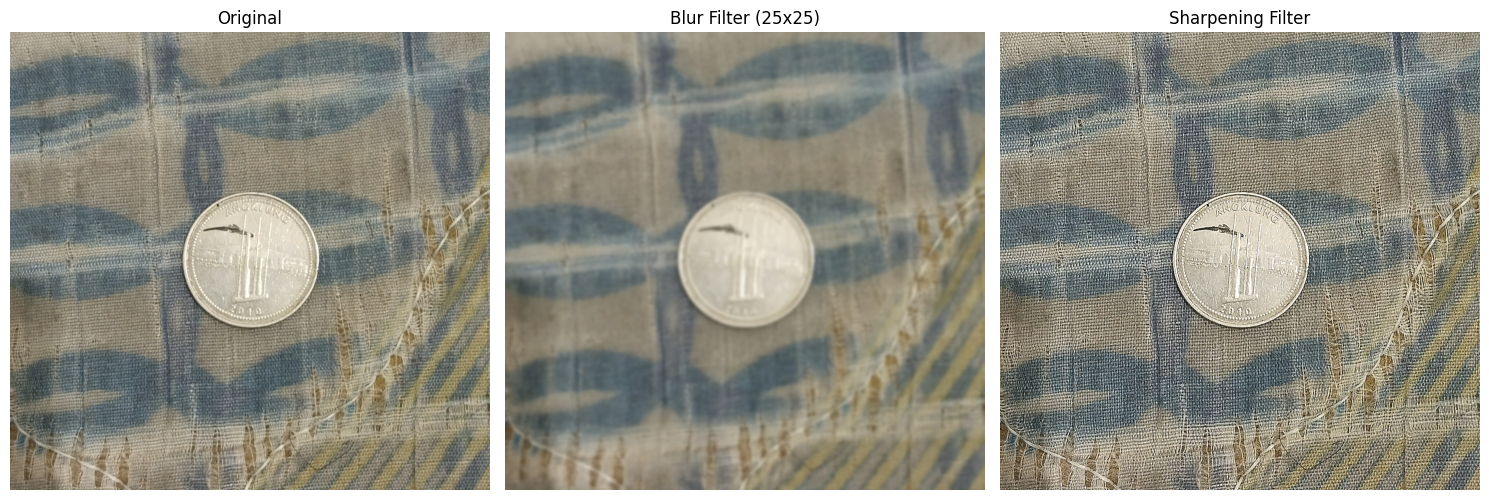

In [49]:
# Blur Filter 
blur_strong = cv2.GaussianBlur(img2, (25, 25), 0)

# Sharpening Filter
kernel_sharpen = np.array([[-1, -1, -1],
                           [-1,  9, -1],
                           [-1, -1, -1]])

# Apply the kernel to the original image 
sharpened_img = cv2.filter2D(img2, -1, kernel_sharpen)

# Compare the results
fig_filter, axs_filter = plt.subplots(1, 3, figsize=(15, 6))

axs_filter[0].imshow(img2)
axs_filter[0].set_title("Original", fontsize=12)
axs_filter[0].axis("off")

axs_filter[1].imshow(blur_strong)
axs_filter[1].set_title("Blur Filter (25x25)", fontsize=12)
axs_filter[1].axis("off")

axs_filter[2].imshow(sharpened_img)
axs_filter[2].set_title("Sharpening Filter", fontsize=12)
axs_filter[2].axis("off")

# Show all plots
plt.tight_layout()
plt.show()

In [50]:
# Save Image
canny_image = os.path.join(os.getcwd(), 'results_ws4', '3_canny_edge_detection.png')
threshold_image = os.path.join(os.getcwd(), 'results_ws4', '3_threshold_result.png')
bounding_box_image = os.path.join(os.getcwd(), 'results_ws4', '3_bounding_box_image.png')
blurred_image = os.path.join(os.getcwd(), 'results_ws4', '3_blurred_image.png')
sharpened_image = os.path.join(os.getcwd(), 'results_ws4', '3_sharpened_image.png')

cv2.imwrite(canny_image, edges)
cv2.imwrite(threshold_image, thresh_img)
cv2.imwrite(bounding_box_image, cv2.cvtColor(img_with_bbox, cv2.COLOR_RGB2BGR))
cv2.imwrite(blurred_image, cv2.cvtColor(blur_strong, cv2.COLOR_RGB2BGR))
cv2.imwrite(sharpened_image, cv2.cvtColor(sharpened_img, cv2.COLOR_RGB2BGR))

True

### **Soal 4 — Deteksi Wajah dan Filter Digital Kreatif**

* Ambil gambar diri Anda dengan ekspresi wajah **netral**.
* Lakukan **deteksi wajah dan landmark** menggunakan salah satu dari:

  * **MediaPipe**, atau
  * **Dlib**, atau
  * **OpenCV**.
* Buat **overlay filter digital kreatif** karya Anda sendiri, misalnya:

  * topi, kumis, masker, helm, aksesoris, atau bentuk unik lainnya.
  * Filter boleh dibuat dari **gambar eksternal (PNG)** *atau* digambar langsung (misal bentuk lingkaran, garis, poligon, dll).
* Pastikan posisi overlay menyesuaikan **landmark wajah** dengan logis.
* **Gunakan alpha blending sebagai saran** agar hasil tampak lebih natural.
* Tampilkan perbandingan antara **gambar asli** dan **hasil dengan filter**.
* Jelaskan bagaimana Anda menghitung posisi overlay dan tantangan yang dihadapi selama implementasi (gunakan **Markdown**).

d:\Code\Sem 7\Mulmed\mm-new\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


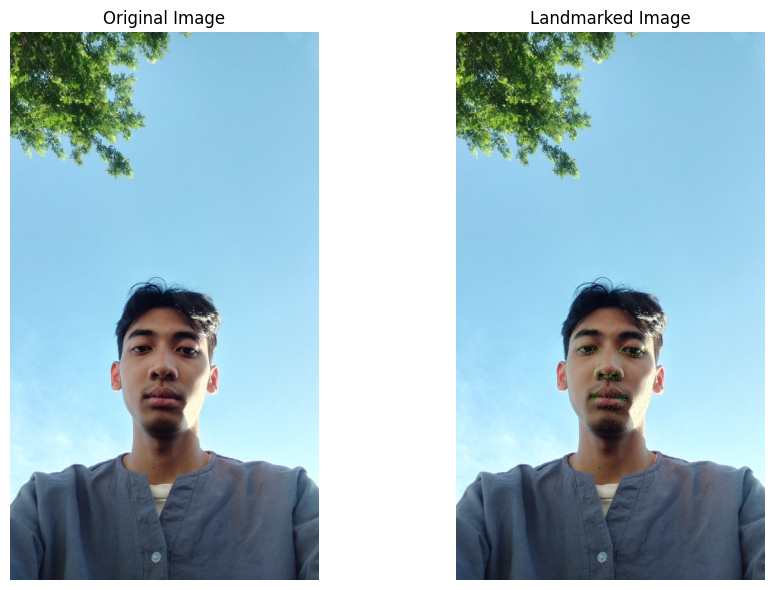

In [7]:
# Load Image
img3 = cv2.imread(IMG_3_PATH)
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
h, w, _ = img3.shape

# Initiate Mediapipe
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils

# Initiate Face Mesh Model
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True,
                                    max_num_faces=1,
                                    refine_landmarks=True,
                                    min_detection_confidence=0.5)

# Create a copy
annotated_image = img3_rgb.copy()

# Process the image to find face landmarks
results = face_mesh.process(img3_rgb)

# Draw face landmarks
face_landmarks = results.multi_face_landmarks[0]
for idx, landmark in enumerate(face_landmarks.landmark):
    cx = int(landmark.x * w)
    cy = int(landmark.y * h)
        
    cv2.circle(annotated_image, (cx, cy), 2, (0, 255, 0), -1)

# Plot Original and Landmarked Image
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

axs[0].imshow(img3_rgb)
axs[0].set_title("Original Image")
axs[0].axis("off")

axs[1].imshow(annotated_image)
axs[1].set_title("Landmarked Image")
axs[1].axis("off")

plt.tight_layout()
plt.show()
face_mesh.close()

Landmarks found. Calculating filter logic...


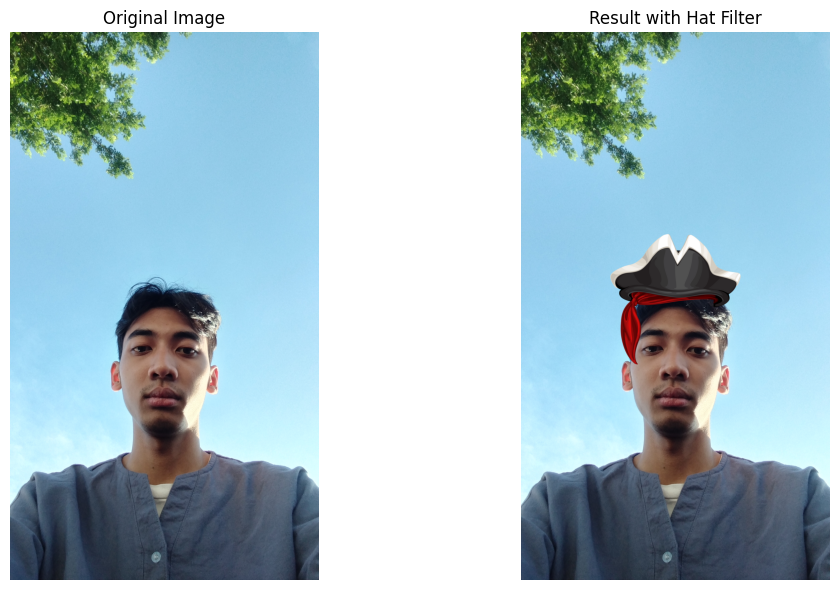

In [13]:
# Load Filter Input 
filter_path = os.path.join(os.getcwd(), 'media', 'pirate_hat.png') 

filter_bgra = cv2.imread(filter_path, cv2.IMREAD_UNCHANGED)
if filter_bgra is None:
    print(f"Error: Could not open filter at '{filter_path}'")
    sys.exit()

# Create a clean copy to draw on
filtered_image = img3_rgb.copy()

# Check if landmarks were found
if results.multi_face_landmarks:
    face_landmarks = results.multi_face_landmarks[0]
    landmarks = face_landmarks.landmark
    
    print("Landmarks found. Calculating filter logic...")
        
    # Scale (Filter Width)
    # Left temple = 130; Right temple = 359
    p_face_left = landmarks[130]
    p_face_right = landmarks[359]
    face_width_px = int((p_face_right.x - p_face_left.x) * w)
    
    scale_factor = 2
    new_filter_width = int(face_width_px * scale_factor)
    
    # Resize the filter PNG
    original_filter_h, original_filter_w, _ = filter_bgra.shape
    ratio = new_filter_width / original_filter_w
    new_filter_height = int(original_filter_h * ratio)
    
    resized_filter_bgra = cv2.resize(filter_bgra, (new_filter_width, new_filter_height))

    # Position (X: left/right; Y: top/bottom)
    p_brow_left = landmarks[105]
    p_brow_right = landmarks[334]
    center_x = int(((p_face_left.x + p_face_right.x) / 2) * w)
    brow_y = int(((p_brow_left.y + p_brow_right.y) / 2) * h)
    
    overlap_factor = 0.25 
    overlap_px = int(new_filter_height * overlap_factor)

    # Calculate the top-left corner position for the filter
    x_pos = int(center_x - new_filter_width / 2)
    y_pos = brow_y - new_filter_height + overlap_px
    
    # Alpha Blending Logic
    filter_h, filter_w, _ = resized_filter_bgra.shape
    bg_h, bg_w, _ = filtered_image.shape
    
    # Boundary Handling
    y1_bg = max(0, y_pos)
    y2_bg = min(bg_h, y_pos + filter_h)
    x1_bg = max(0, x_pos)
    x2_bg = min(bg_w, x_pos + filter_w)
    
    y1_fg = max(0, -y_pos)
    y2_fg = y1_fg + (y2_bg - y1_bg)
    x1_fg = max(0, -x_pos)
    x2_fg = x1_fg + (x2_bg - x1_bg)

    # Blend only if there is an overlapping area
    if not (y1_bg >= y2_bg or x1_bg >= x2_bg):
        
        # Get the filter patch to be overlaid
        filter_patch_bgra = resized_filter_bgra[y1_fg:y2_fg, x1_fg:x2_fg]
        
        # Separate BGR and Alpha channels
        filter_rgb = cv2.cvtColor(filter_patch_bgra[:, :, :3], cv2.COLOR_BGR2RGB)
        alpha_mask = filter_patch_bgra[:, :, 3] / 255.0 # Normalize 0.0-1.0
        
        # Create a 3-channel mask
        alpha_mask_3ch = cv2.merge([alpha_mask, alpha_mask, alpha_mask])
        
        # Get the Region of Interest (ROI) from the background
        roi = filtered_image[y1_bg:y2_bg, x1_bg:x2_bg]
        
        # Combine (blend)
        blended_roi = (1.0 - alpha_mask_3ch) * roi + alpha_mask_3ch * filter_rgb
        
        # Place the blended ROI back into the background image
        filtered_image[y1_bg:y2_bg, x1_bg:x2_bg] = blended_roi.astype(np.uint8)
    else:
        print("Filter is outside image bounds, blending cancelled.")

else:
    print("Face not detected. Filter cannot be applied.")

# Display the comparison
fig_final, axs_final = plt.subplots(1, 2, figsize=(12, 6))

axs_final[0].imshow(img3_rgb) 
axs_final[0].set_title("Original Image")
axs_final[0].axis("off")

axs_final[1].imshow(filtered_image) 
axs_final[1].set_title("Result with Hat Filter")
axs_final[1].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# Save Image
overlay_filter = os.path.join(os.getcwd(), 'results_ws4', '4_overlay_filter.png')
landmarked_image = os.path.join(os.getcwd(), 'results_ws4', '4_landmarked_image.png')

cv2.imwrite(overlay_filter, cv2.cvtColor(filtered_image, cv2.COLOR_RGB2BGR))
cv2.imwrite(landmarked_image, cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))


True

### **Soal 5 — Perspektif dan Peningkatan Kualitas Citra**

* Ambil gambar **objek datar** seperti karya tangan di kertas, tulisan di papan tulis, atau foto produk di meja dengan kondisi pencahayaan atau sudut yang tidak ideal.
* Lakukan **preprocessing** untuk memperbaiki tampilan agar lebih rapi dan jelas, dengan langkah-langkah:

  * Konversi ke **grayscale**.
  * **Koreksi perspektif (transformasi homografi)** menggunakan **4 titik manual** agar objek terlihat sejajar dan tidak terdistorsi.
  * Terapkan **thresholding adaptif atau Otsu** (pilih salah satu, dan jelaskan alasan pilihan Anda).
* Tampilkan **setiap tahap pemrosesan dalam satu grid** agar mudah dibandingkan.
* Jelaskan fungsi masing-masing tahap dan bagaimana teknik ini meningkatkan kualitas visual citra (gunakan **Markdown**).

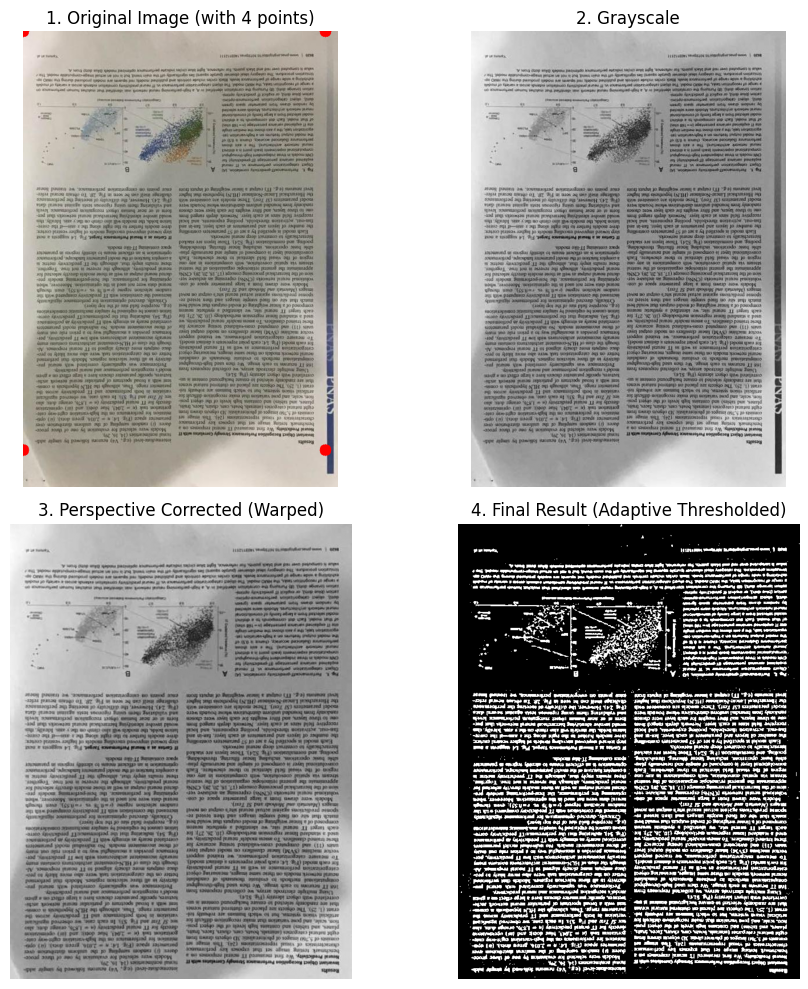

In [39]:
# Load Image
img4 = cv2.imread(IMG_4_PATH)
img4_rgb = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

# Grayscale Conversion
img_gray = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

# Perspective Correction
# (x, y) from the 4 corners in original image
pts_src = np.float32([
    [0, 0],  # Top-left corner 
    [520, 0],  # Top-right corner 
    [520, 720],  # Bottom-right corner )
    [0, 720]   # Bottom-left corner 
])

# Define the desired output size 
output_width = 600
output_height = 800
pts_dst = np.float32([
    [0, 0],
    [output_width, 0],
    [output_width, output_height],
    [0, output_height]
])

# Calculate the perspective transformation matrix
M = cv2.getPerspectiveTransform(pts_src, pts_dst)

# Apply the "warp" transformation to the grayscale image
img_warped = cv2.warpPerspective(img_gray, M, (output_width, output_height))

# Thresholding

# Denoising
img_blur = cv2.GaussianBlur(img_warped, (5,5), 0) # Apply blur to the warped image

# Morphological Filtering 
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,25))
background = cv2.morphologyEx(img_blur, cv2.MORPH_CLOSE, kernel)

# Illumination Correction
background = np.where(background == 0, 1, background) 
corrected = cv2.divide(img_warped, background, scale=255)

# Adaptive Thresholding 
result = cv2.adaptiveThreshold((corrected*255).astype(np.uint8),
                               255,
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY,
                               25, -5)


# Grid Display of All Steps
plt.figure(figsize=(10, 10))

# Original Image 
img_with_dots = img4_rgb.copy()
for p in pts_src:
    cv2.circle(img_with_dots, (int(p[0]), int(p[1])), 10, (255, 0, 0), -1)
plt.subplot(2, 2, 1)
plt.imshow(img_with_dots)
plt.title("1. Original Image (with 4 points)")
plt.axis('off')

# Grayscale Image
plt.subplot(2, 2, 2)
plt.imshow(img_gray, cmap='gray')
plt.title("2. Grayscale")
plt.axis('off')

# Perspective Corrected Result
plt.subplot(2, 2, 3)
plt.imshow(img_warped, cmap='gray')
plt.title("3. Perspective Corrected (Warped)")
plt.axis('off')

# Final Result (Thresholded)
plt.subplot(2, 2, 4)
plt.imshow(result, cmap='gray')
plt.title("4. Final Result (Adaptive Thresholded)")
plt.axis('off')

plt.tight_layout()
plt.show()

In [42]:
# Save Image
warped_image = os.path.join(os.getcwd(), 'results_ws4', '5_warped_image.png')
final_image = os.path.join(os.getcwd(), 'results_ws4', '5_final_image.png')

cv2.imwrite(warped_image, img_warped)
cv2.imwrite(final_image, result)

True

### **Aturan Umum Pengerjaan**

* Kerjakan secara **mandiri**.
* Bantuan AI (seperti ChatGPT, Copilot, dsb.) diperbolehkan **dengan bukti percakapan** (screenshot / link / script percakapan).
* Source code antar mahasiswa harus berbeda.
* Jika mendapat bantuan teman, tuliskan nama dan NIM teman yang membantu.
* Plagiarisme akan dikenakan sanksi sesuai aturan akademik ITERA.
* Cantumkan seluruh **credit dan referensi** yang digunakan di bagian akhir notebook.
* Penjelasan setiap soal ditulis dalam **Markdown**, bukan di dalam komentar kode.

---

### **Aturan Pengumpulan**

* Semua file kerja Anda (notebook `.ipynb`, gambar, dan hasil) **wajib diunggah ke GitHub repository tugas sebelumnya**.

  * Gunakan struktur folder berikut di dalam repo Anda:

    ```
    /Nama_NIM_Repo/ # Nama repo sebelumnya
      ├── assets_ws4/     # berisi semua gambar atau video asli (input)
      ├── results_ws4/    # berisi semua hasil modifikasi dan output
      ├── worksheet4.ipynb
      └── NIM_Worksheet4.pdf
    ```
* File yang dikumpulkan ke **Tally** hanya berupa **hasil PDF** dari notebook Anda, dengan format nama:

  ```
  NIM_Worksheet4.pdf
  ```
* Pastikan notebook telah dijalankan penuh sebelum diekspor ke PDF.
* Sertakan tautan ke repository GitHub Anda di bagian atas notebook atau di halaman pertama PDF.

---

### ✅ **Catatan Akhir**

> Worksheet 4 ini bertujuan mengasah pemahaman Anda tentang manipulasi citra digital secara praktis. Gunakan kreativitas Anda untuk menghasilkan hasil visual yang menarik dan penjelasan konseptual yang jelas.